# Preyecto ML osteoporosis

Importación de librerías

In [91]:
import pandas as pd
import numpy as np
import os

from PIL import Image
from matplotlib.image import imread
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

from tensorflow import keras
from tensorflow.keras import layers


Carga de dataset

In [9]:
dataset = keras.utils.image_dataset_from_directory("data/Osteoporosis_Knee_X_ray")

Found 239 files belonging to 3 classes.


Creación de X e y para entrenamiento de modelos

In [41]:
base = "C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc"

lista_rutas = []
target = []

rutas = [
    "data/Osteoporosis_Knee_X_ray/normal",
    "data/Osteoporosis_Knee_X_ray/osteopenia",
    "data/Osteoporosis_Knee_X_ray/osteoporosis"
]

for ruta in rutas:
    ruta_total = os.path.join(base, ruta)

    for foto in os.listdir(ruta_total):
        nuevo_nombre = foto.replace("JPEG", "jpg")

        ruta_foto = os.path.join(ruta_total, foto)
        lista_rutas.append(ruta_foto)

        clase_actual = os.path.basename(ruta_total)
        target.append(clase_actual)

print(lista_rutas)
print(len(lista_rutas))
print("*" * 50)
print(target)
print(len(target))

['C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N1.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N10.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N11.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N12.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N13.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyecto_ml\\proyecto_machine_learning_agc\\data/Osteoporosis_Knee_X_ray/normal\\N14.jpg', 'C:\\Users\\Administrador\\Desktop\\repositorios_agc\\repo_agc\\proyec

In [42]:
df = pd.DataFrame({"path_fotos": lista_rutas, "target": target})
df

,path_fotos,target
0,C:\Users\Administrador\Desktop\repositorios_ag...,normal
1,C:\Users\Administrador\Desktop\repositorios_ag...,normal
2,C:\Users\Administrador\Desktop\repositorios_ag...,normal
3,C:\Users\Administrador\Desktop\repositorios_ag...,normal
4,C:\Users\Administrador\Desktop\repositorios_ag...,normal
...,...,...
234,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
235,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
236,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis
237,C:\Users\Administrador\Desktop\repositorios_ag...,osteoporosis


In [43]:
df["target"].value_counts()

target
osteopenia      154
osteoporosis     49
normal           36
Name: count, dtype: int64

In [69]:
lista_fotos_1d = []
lista_fotos_flat = []

for foto in df["path_fotos"]:
    # image = imread(foto)
    img = Image.open(foto).convert("L")
    img_resized = img.resize((256, 256))
    img_array = np.array(img_resized)

    img_array = img_array[..., np.newaxis]
    img_flat = img_array.flatten()

    lista_fotos_1d.append(img_array)
    lista_fotos_flat.append(img_flat)

print(lista_fotos_1d)
print(len(lista_fotos_1d))
print("_" * 50)
print(lista_fotos_flat)
print(len(lista_fotos_flat))

[array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]]], shape=(256, 256, 1), dtype=uint8), array([[[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[0],
        [0],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [

## RandomForest

In [70]:
X = np.array(lista_fotos_flat)
X.shape

(239, 65536)

In [71]:
y = df["target"]
y

0            normal
1            normal
2            normal
3            normal
4            normal
           ...     
234    osteoporosis
235    osteoporosis
236    osteoporosis
237    osteoporosis
238    osteoporosis
Name: target, Length: 239, dtype: object

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(191, 65536)
(191,)
(48, 65536)
(48,)


In [79]:
rf = RandomForestClassifier(
    random_state=11,
    class_weight='balanced',
    n_jobs=-1
)

parametros = {
    "n_estimators": [100, 300, 500],        
    "max_depth": [None, 10, 20],  
    # sqrt: Usa la raíz cuadrada del número total de features    
    # #log₂(número_de_features) - ejemplo: log₂(16) = 4      
    "max_features": ["sqrt", "log2"],       
    "max_leaf_nodes": [None, 20]           
}

grid = GridSearchCV(
    rf,
    param_grid=parametros,
    cv=3,                
    scoring="accuracy", 
    verbose=3
)

grid.fit(X_train, y_train)

print("Mejores parámetros:", grid.best_params_)
print("Mejor accuracy:", grid.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.672 total time=   1.2s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.672 total time=   0.9s
[CV 3/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=100;, score=0.587 total time=   0.7s
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.672 total time=   2.5s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.672 total time=   2.4s
[CV 3/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=300;, score=0.603 total time=   2.2s
[CV 1/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=500;, score=0.672 total time=   3.7s
[CV 2/3] END max_depth=None, max_features=sqrt, max_leaf_nodes=None, n_estimators=500;, score=0.672 total

In [94]:
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    max_features='sqrt',
    class_weight='balanced', # correción del desbalanceo de clases
    random_state=11,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)

acc = accuracy_score(y_test, y_pred)

y_pred_proba = rf_model.predict_proba(X_test)

auc = roc_auc_score(y_test, y_pred_proba, multi_class='ovr')

print("Accuracy: ", round(acc, 4))
print("AUC: ", round(auc, 4))
print("Confusion matrix: ", confusion_matrix(y_test, y_pred))
print("_" * 80)
print("Classification report: ", classification_report(y_test, y_pred))



Accuracy:  0.5833
AUC:  0.5868
Confusion matrix:  [[ 2  8  0]
 [ 0 26  3]
 [ 0  9  0]]
________________________________________________________________________________
Classification report:                precision    recall  f1-score   support

      normal       1.00      0.20      0.33        10
  osteopenia       0.60      0.90      0.72        29
osteoporosis       0.00      0.00      0.00         9

    accuracy                           0.58        48
   macro avg       0.53      0.37      0.35        48
weighted avg       0.57      0.58      0.51        48



<Axes: >

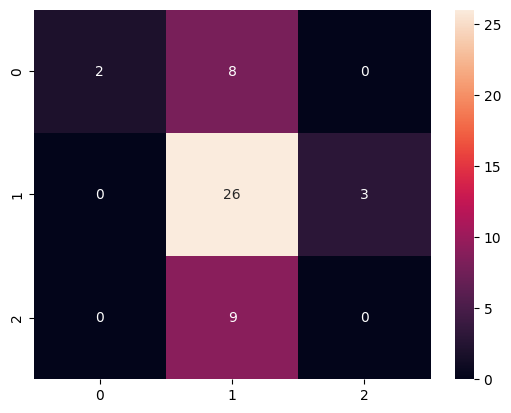

In [87]:
c_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(c_matrix, annot=True)

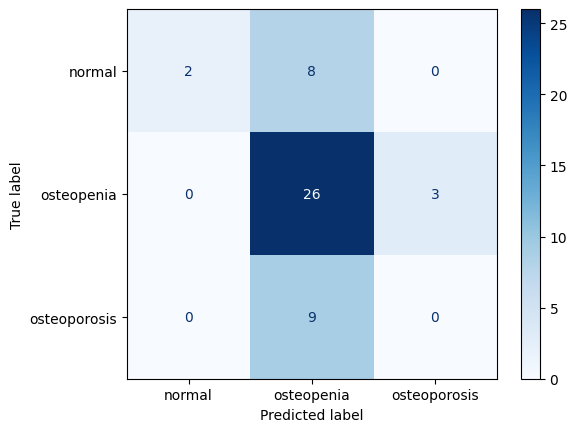

In [90]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["normal", "osteopenia", "osteoporosis"])
disp.plot(cmap='Blues')